In [1]:
%matplotlib inline
import numpy as np
import theano
import theano.tensor as T
import operator
import matplotlib.pyplot as plt
import timeit
import cPickle as pickle

import cartpole_lib as cp

In [2]:
%cd theano-rnn/
import rnn_minibatch as rnn
%cd ..

/Users/jtobin/Documents/Courses/Robotics/FinalProject/crossrobot/theano-rnn
/Users/jtobin/Documents/Courses/Robotics/FinalProject/crossrobot


In [3]:
dt, eps = 0.1, 0.1
Q = np.eye(6)
R = np.eye(1)

uref = 0.
K = []
xs = []
Quu = []
for i in np.arange(5,21,1):
    xref = np.array([0,np.pi,0,0,i,i/10.])
    A, B, c = cp.linearize_cartpole_ext(xref, uref, dt, eps)
    Kc, P, Quuc = cp.lqr_infinite_horizon(A, B, Q, R)
    K.append(Kc)
    K.append(Kc)
    Quu.append(Quuc)
    Quu.append(Quuc)
    xs.append(np.array([0, np.pi-np.pi/4, 0, 0, i, i/10.]))
    xs.append(np.array([0, np.pi+np.pi/4, 0, 0, i, i/10.]))


tr_x, tr_u, val_x, val_u, te_x, te_u = cp.gen_train_data(xs, K, Quu,
                                                         num_traj=10, traj_size=500)

In [4]:
n_hidden = 50
n_in = 5
n_out = 2
n_steps = 20
n_seq = 10 # per batch
n_batches = int(np.floor(tr_x.shape[0] / (n_steps*n_seq)))

input_data = np.c_[tr_x[:,:4], tr_u]
target = tr_x[:,4:]

def shuffle_data(in_data, target_data):
    a = np.swapaxes(np.c_[in_data, target_data],0,1)
    np.random.shuffle(a)
    a = np.swapaxes(a, 0, 1)
    return a[:,:,:n_in], a[:,:,n_in:]

seq = np.zeros([n_steps, n_seq*n_batches, n_in])
for i in range(n_seq*n_batches):
    seq[:,i,:] = input_data[i*n_steps:(i+1)*n_steps,:]
    
targets = np.zeros([n_steps, n_seq*n_batches, n_out])
for i in range(n_seq*n_batches):
    targets[:,i,:] = target[i*n_steps:(i+1)*n_steps,:]

seq, targets = shuffle_data(seq, targets)


In [11]:
model = rnn.MetaRNN(n_in=n_in, n_hidden=n_hidden, n_out=n_out,
                    learning_rate=0.005, learning_rate_decay=1.,
                    n_epochs=500, batch_size=n_seq, activation='relu',
                    L2_reg=0.00001)

In [12]:
model.fit(seq, targets, validate_every=10, optimizer='rmsprop')

... training
epoch 10, mb 800/800, train loss 4.416298 lr: 0.005000
epoch 20, mb 800/800, train loss 2.410172 lr: 0.005000
epoch 30, mb 800/800, train loss 2.893909 lr: 0.005000
epoch 40, mb 800/800, train loss 1.739475 lr: 0.005000
epoch 50, mb 800/800, train loss 1.346695 lr: 0.005000
epoch 60, mb 800/800, train loss 2.579620 lr: 0.005000
epoch 70, mb 800/800, train loss 2.105947 lr: 0.005000
epoch 80, mb 800/800, train loss 1.574520 lr: 0.005000
epoch 90, mb 800/800, train loss 1.555827 lr: 0.005000
epoch 100, mb 800/800, train loss 1.420470 lr: 0.005000
epoch 110, mb 800/800, train loss 1.704239 lr: 0.005000
epoch 120, mb 800/800, train loss 1.741914 lr: 0.005000
epoch 130, mb 800/800, train loss 1.372703 lr: 0.005000
epoch 140, mb 800/800, train loss 1.525913 lr: 0.005000
epoch 150, mb 800/800, train loss 1.145386 lr: 0.005000
epoch 160, mb 800/800, train loss 1.525811 lr: 0.005000
epoch 170, mb 800/800, train loss 1.342861 lr: 0.005000
epoch 180, mb 800/800, train loss 1.949643 l

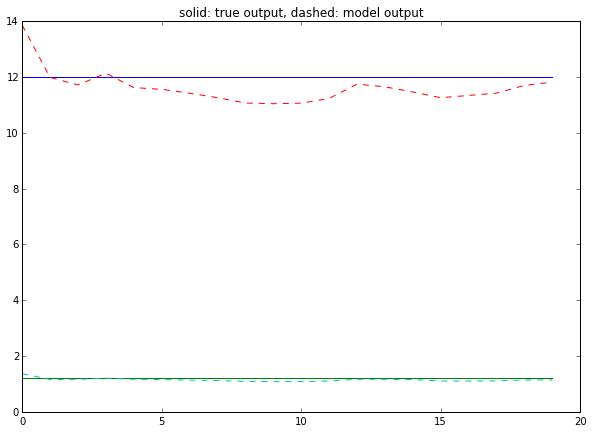

In [13]:
plt.figure(figsize=(10,7))
plt.plot(targets[:,173,:], label='True parameters')
guess = model.predict(seq[:,173, :][:, np.newaxis, :])
guessed_targets = plt.plot(guess.squeeze(), linestyle='--')
plt.title('solid: true output, dashed: model output')

In [14]:
model.predict(seq[1:,55, :][:, np.newaxis, :]).mean(axis=0)

array([[ 15.93528839,   0.90677095]])

In [15]:
err = model.predict(seq).mean(axis=0) - targets.mean(axis=0)

In [26]:
err.mean(axis=0), err.std(axis=0)

(array([-0.09933263, -0.03915922]), array([ 0.6267503 ,  0.11091936]))

In [22]:
err2 = model.predict(seq)[-1,:,:] - targets.mean(axis=0)

In [25]:
err2.mean(axis=0), err2.std(axis=0)

(array([-0.03389264, -0.01350137]), array([ 0.65085631,  0.07800258]))

In [18]:
with open('mass_estimator.pickle','wb') as output_file:
    pickle.dump(model, output_file)

In [136]:
rnn_test = rnn.RNN()

TypeError: __init__() takes at least 5 arguments (1 given)

In [ ]:
rnn_test = rnn.RNN

In [8]:
with open('pickle_test.pickle', 'r') as input_file:
    model_test = pickle.load(input_file)

In [10]:
model_test.fit()

TypeError: fit() takes at least 3 arguments (1 given)